**Almas Fathin Irbah**
> Dataset : "Women's E-Commerce Clothing Reviews" \
> Sumber : Kaggle \
> Link Dataset : https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

# **Preparation**

In [1]:
from google.colab import drive

# u/ dataframe
import pandas as pd
import re

# u/ split data
from sklearn.model_selection import train_test_split

# u/ preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding, Activation, Dense, Softmax, Dropout, SpatialDropout1D
from keras.layers.recurrent import LSTM

# u/ visualisasi plot
import matplotlib.pyplot as plt

## Mount to Drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# check the path
!pwd

/content


In [5]:
# change folder
%cd '/content/drive/My Drive/Submission Dicoding'

/content/drive/My Drive/Submission Dicoding


In [6]:
# check file in folder
!ls

'Womens Clothing E-Commerce Reviews.csv'


# **Cleaning the Data**

In [7]:
# read the Dataset
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
cols = ['Review Text', 'Recommended IND']
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', usecols = cols)
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [8]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [9]:
# simple data checking - get row and column of dataframe
print(df.shape)

(23486, 2)


In [10]:
# simple data checking - get columns name
print(df.columns)

Index(['Review Text', 'Recommended IND'], dtype='object')


In [11]:
# check standard missing value - multiple column
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Review Text
False    22641
True       845
Name: Review Text, dtype: int64

Recommended IND
False    23486
Name: Recommended IND, dtype: int64



In [12]:
# check standard missing value - Review Text column
df[df['Review Text'].isnull()]

,Review Text,Recommended IND
92,NaN,1
93,NaN,1
98,NaN,1
135,NaN,1
142,NaN,1
...,...,...
23258,NaN,1
23301,NaN,1
23303,NaN,1
23470,NaN,1


In [13]:
# drop the Dataset
df = df.dropna()
print(df)

                                             Review Text  Recommended IND
0      Absolutely wonderful - silky and sexy and comf...                1
1      Love this dress!  it's sooo pretty.  i happene...                1
2      I had such high hopes for this dress and reall...                0
3      I love, love, love this jumpsuit. it's fun, fl...                1
4      This shirt is very flattering to all due to th...                1
...                                                  ...              ...
23481  I was very happy to snag this dress at such a ...                1
23482  It reminds me of maternity clothes. soft, stre...                1
23483  This fit well, but the top was very see throug...                0
23484  I bought this dress for a wedding i have this ...                1
23485  This dress in a lovely platinum is feminine an...                1

[22641 rows x 2 columns]


In [14]:
# replacing the row values 
df['Recommended IND'] = df['Recommended IND'].apply(str)
df['Recommended IND'].replace(to_replace = ['0','1'], value = ['Not recommended','Recommended'], inplace=True)
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,Recommended
1,Love this dress! it's sooo pretty. i happene...,Recommended
2,I had such high hopes for this dress and reall...,Not recommended
3,"I love, love, love this jumpsuit. it's fun, fl...",Recommended
4,This shirt is very flattering to all due to th...,Recommended


# **Modelling and Training the Dataset**

In [15]:
# labeling the Recommended IND column
for column in ['Recommended IND']:
  dummies = pd.get_dummies(df[column])
  df[dummies.columns] = dummies

df= df.drop(columns= ['Recommended IND'])

In [16]:
# check the dataframe
df

,Review Text,Not recommended,Recommended
0,Absolutely wonderful - silky and sexy and comf...,0,1
1,Love this dress! it's sooo pretty. i happene...,0,1
2,I had such high hopes for this dress and reall...,1,0
3,"I love, love, love this jumpsuit. it's fun, fl...",0,1
4,This shirt is very flattering to all due to th...,0,1
...,...,...,...
23481,I was very happy to snag this dress at such a ...,0,1
23482,"It reminds me of maternity clothes. soft, stre...",0,1
23483,"This fit well, but the top was very see throug...",1,0
23484,I bought this dress for a wedding i have this ...,0,1


In [17]:
# change data type
text = df['Review Text'].values
label = df[['Not recommended', 'Recommended']].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# split dataset 20% test / validation
genre_train, genre_test, label_train, label_test = train_test_split(text, label, test_size = 0.2)

In [21]:
# use tokenizer and convert to sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(genre_train) 
tokenizer.fit_on_texts(genre_test)
 
sekuens_train = tokenizer.texts_to_sequences(genre_train)
sekuens_test = tokenizer.texts_to_sequences(genre_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [25]:
# modelling sequential with embedding and LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [26]:
# modelling compile with optimizer adam
Adam(learning_rate=0.00146, name='Adam')
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [27]:
# using callback for accuracy and validation above 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [28]:
# train the model
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
566/566 - 78s - loss: 0.3328 - accuracy: 0.8610 - val_loss: 0.2557 - val_accuracy: 0.8850
Epoch 2/30
566/566 - 52s - loss: 0.2224 - accuracy: 0.9107 - val_loss: 0.2556 - val_accuracy: 0.8892
Epoch 3/30
566/566 - 52s - loss: 0.1913 - accuracy: 0.9215 - val_loss: 0.2660 - val_accuracy: 0.8805
Epoch 4/30
566/566 - 52s - loss: 0.1689 - accuracy: 0.9341 - val_loss: 0.2867 - val_accuracy: 0.8914
Epoch 5/30
566/566 - 52s - loss: 0.1496 - accuracy: 0.9416 - val_loss: 0.3080 - val_accuracy: 0.8828
Epoch 6/30
566/566 - 52s - loss: 0.1295 - accuracy: 0.9531 - val_loss: 0.3402 - val_accuracy: 0.8856
Epoch 7/30
566/566 - 52s - loss: 0.1123 - accuracy: 0.9591 - val_loss: 0.3769 - val_accuracy: 0.8845
Epoch 8/30
566/566 - 52s - loss: 0.0975 - accuracy: 0.9659 - val_loss: 0.3935 - val_accuracy: 0.8783
Epoch 9/30
566/566 - 52s - loss: 0.0846 - accuracy: 0.9702 - val_loss: 0.4512 - val_accuracy: 0.8779
Epoch 10/30
566/566 - 52s - loss: 0.0750 - accuracy: 0.9732 - val_loss: 0.4932 - val_accura

# **Plotting Accuracy**

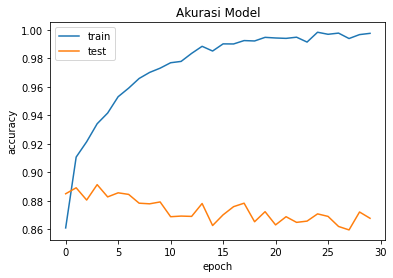

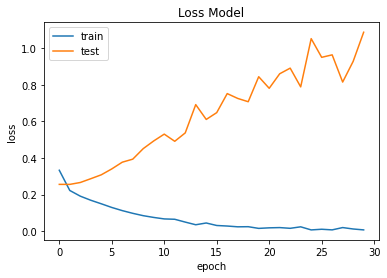

In [29]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()